In [48]:
#引入資料:2021年消防水域救援統計

import chardet 
import pandas as pd 
#當無法正確讀取檔案時，需使用 chardet 來修正解碼方式
#'rb':二進制讀取模式
with open('2021WaterSafety.csv','rb') as f:
    result = chardet.detect(f.read())
#encoding 即使用chardet 剛剛檢測到的編碼方式進行解碼
#Data_0 : Raw Data 
Data_0 = pd.read_csv('2021WaterSafety.csv',encoding = result['encoding'],header = 0 ,index_col = 0)
Data_0 = Data_0.rename(columns ={'年齡(歲)' : 'age','溺水\n結果':'Result'})
Data_0['age'] = Data_0['age'].replace('不詳','unknown')
Data_0['游泳能力'] = Data_0['游泳能力'].replace('不詳','unknown')
Data_0['性別'] = Data_0['性別'].replace('不詳','unknown')
Data_0['溺者身分'] = Data_0['溺者身分'].replace('不詳','unknown')
Data_0

,縣市別,年,月,日,時,分,溺水地點或附近地標\n(水域、溪流名稱),水域種類,溺水原因,Result,性別,age,溺者身分,游泳能力
編號,,,,,,,,,,,,,,
1,臺北市,2021,1,4,19,34,福林橋(河濱內雙溪街對面側),溪河,自殺,獲救,男,18,高中,unknown
2,臺北市,2021,1,5,14,41,基隆河(麥帥一橋),溪河,自殺(員警報案疑似輕生現場留有機車，搜尋後未發現，經家屬同意後結束搜索。),失蹤,男,36,社會人士(小於65歲),unknown
3,臺北市,2021,1,11,22,25,基隆河(5號水門),溪河,浮屍,死亡,男,40,社會人士(小於65歲),unknown
4,臺北市,2021,1,14,13,29,基隆河(觀山河濱公園，近觀山173號路燈),溪河,浮屍,死亡,男,60,社會人士(小於65歲),unknown
5,臺北市,2021,1,17,6,46,迪化汙水處理場旁河堤外(臺北市大同區酒泉街235號),溪河,浮屍,死亡,男,50,社會人士(小於65歲),unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,高雄港,2021,11,10,5,51,高雄港珊瑚群館光榮碼頭,碼頭,自殺(感情糾紛),獲救,男,24,社會人士(小於65歲),不會
923,高雄港,2021,11,10,5,51,高雄港珊瑚群館光榮碼頭,碼頭,自殺(感情糾紛),獲救,女,25,社會人士(小於65歲),不會
924,高雄港,2021,12,10,2,55,高雄港12號碼頭(海音館),碼頭,浮屍(不詳),死亡,女,24,社會人士(小於65歲),unknown


In [2]:
#答案 : 將數據進行初步統計整理並製成圖表。
#回答五 : 利用 pandas Profiling 進行數據報告輸出RawData的初步信息分析
#下載pandas_profiling
!jupyter nbextension enable --py widgetsnbextension
import pandas as pd
from pandas_profiling import ProfileReport 

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
C:\Users\User\AppData\Local\Temp\ipykernel_9016\3948788322.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
import pandas_profiling 
Basic_info = pandas_profiling.ProfileReport(Data_0)
Basic_info

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
#列出各行中同行中不同值的內容

Data_column_noun = Data_0["溺者身分"].unique()
Data_column_noun

array(['高中', '社會人士(小於65歲)', '65歲以上', '輟學(係指小學、國中、高中之中輟生)', '不詳', '大專',
       '國中', '小學', '學齡前兒童'], dtype=object)

In [5]:
#計算同行中共有幾種不同的值
Data_column_count_noun = Data_0["溺者身分"].nunique()
Data_column_count_noun

9

In [6]:
Data_G = Data_0.groupby("溺水原因").size()
Data_G

溺水原因
交通事故                           1
交通事故(強降雨淹水行駛機車跌落農田)            1
交通事故(汽車摔入幸福高爾夫球場水池內，水池約5米深)    1
交通事故(疑似騎腳踏車自摔)                 1
交通事故(行駛自小客不明原因衝入養殖魚塭內)         1
                              ..
自殺(跳橋)                         2
自殺(跳水)                         1
自殺(跳水後自行游上岸)                   1
自殺(跳海)                         1
自殺(身上疑似有酒味)                    1
Length: 307, dtype: int64

In [11]:
Data_months_counts1 = Data_0["月"].value_counts()
Data_months_counts1

10    187
8     107
5      91
9      82
7      72
4      68
6      66
1      62
3      55
12     49
11     45
2      42
Name: 月, dtype: int64

In [14]:
Data_Values.to_csv('Data_months_counts')
Data_months_counts = pd.read_csv('Data_months_counts')
Data_months_counts

,Unnamed: 0,月
0,10,187
1,8,107
2,5,91
3,9,82
4,7,72
5,4,68
6,6,66
7,1,62
8,3,55
9,12,49


In [9]:
Data_G = Data_0.groupby('月').size()
Data_G.to_csv('Data_G')
Data_g = pd.read_csv('Data_G').rename(columns={'月': 'month', '0':'counts'})
Data_g

,month,counts
0,1,62
1,2,42
2,3,55
3,4,68
4,5,91
5,6,66
6,7,72
7,8,107
8,9,82
9,10,187


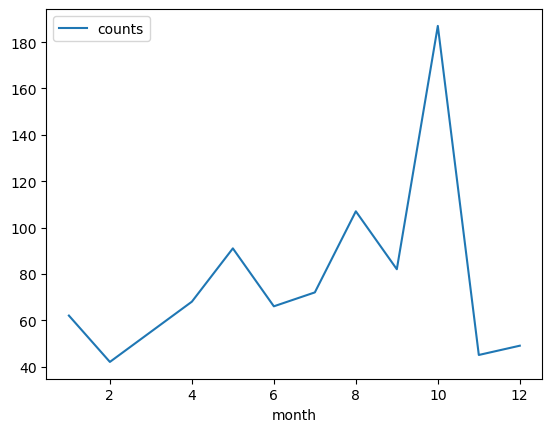

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
Data_plot = Data_g.plot(x='month',y='counts',kind='line')
plt.show()

In [30]:
Data_g_age = Data_0.groupby('age').size()
Data_g_age.to_csv('df_age_G')
Df_age_G = pd.read_csv('df_age_G').rename(columns ={'0' : 'counts'})
Df_age_G.nlargest(5,'counts')

,age,counts
87,unknown,55
50,60,38
30,40,30
40,50,29
61,70,27


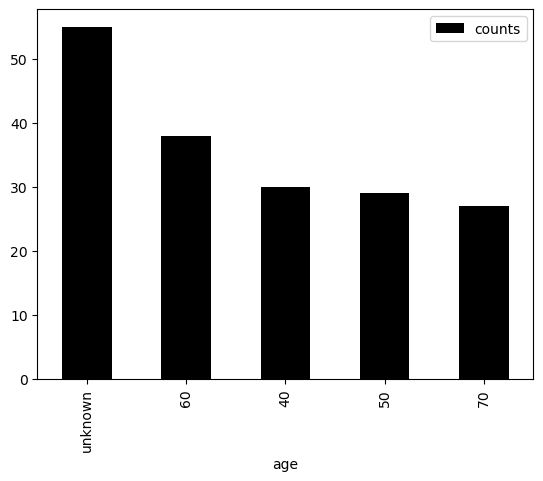

In [36]:
Df_age_G_plot = Df_age_G.nlargest(5,'counts').plot(x='age',y='counts',kind='bar',color='black')
plt.show()

In [42]:
Data_place_g = Data_0.groupby('縣市別').size()
Data_place_g.to_csv('df_place_g')
Place_counts = pd.read_csv('df_place_g').rename(columns ={'0' : 'counts'})
Place_counts

,縣市別,counts
0,南投縣,10
1,嘉義縣,14
2,基隆市,11
3,基隆港,19
4,宜蘭縣,23
5,屏東縣,25
6,彰化縣,46
7,新北市,206
8,新竹市,9
9,新竹縣,9


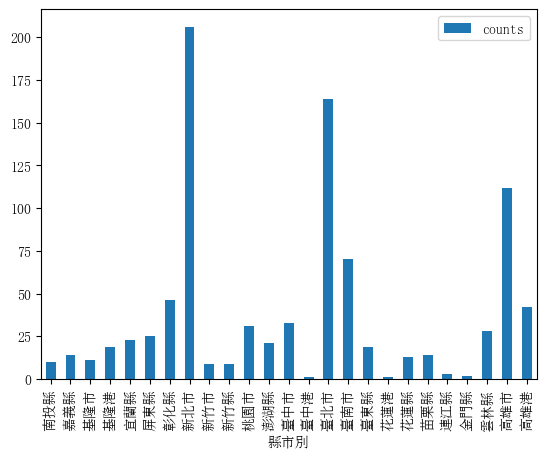

In [46]:
place_fig = Place_counts.plot(x='縣市別',y='counts',kind='bar')
plt.rcParams['font.family'] = ['Simsun']
plt.show()

In [66]:
Data_Results_g = Data_0.groupby('Result').size()
Data_Results_g.to_csv('df_results_g')
Result_counts = pd.read_csv('df_results_g').rename(columns ={'0' : 'counts'})
Result_counts

,Result,counts
0,失蹤,25
1,死亡,544
2,獲救,357


In [74]:
pie_P = Data_0['Result'].value_counts(normalize=True) * 100
pie_P.to_csv('pie_P')
Pie_P = pd.read_csv('pie_p').rename(columns ={'Unnamed: 0' : 'Result','Result':'Percentage'})
Pie_P

,Result,Percentage
0,死亡,58.747300
1,獲救,38.552916
2,失蹤,2.699784


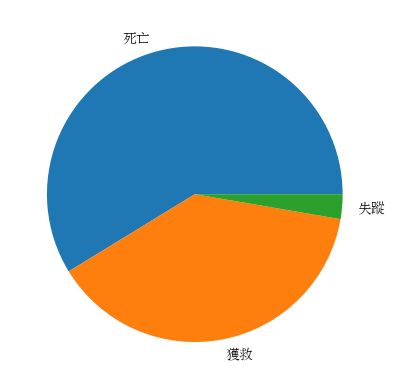

In [78]:
plt.pie(Pie_P['Percentage'],labels = Pie_P['Result'])
plt.show()